# Efficient Frontier

2 Computing Efficient Portfolios -  - Financial Engineering by Simon Benninga [youtube](https://www.youtube.com/watch?v=QoIa_AnN0OA&index=2&list=PL49E8B0672C047CE1)

Portfolio Optimization in Excel by Colby Wright [youtube](https://www.youtube.com/watch?v=FZyAXP4syD8)

16 Portfolio Management by Jake Xia [youtube](https://www.youtube.com/watch?v=8TJQhQ2GZ0Y) [site](http://ocw.mit.edu/18-S096F13)

In [1]:
# import modules
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as la
%matplotlib inline

In [2]:
# make directory if not exist
if not os.path.isdir('img'):
    os.mkdir('img')

In [3]:
# prepare for data loading
start = "2017-01-01"
end   = "2017-12-31"
dates = pd.date_range(start, end)

data_dir = "../data/finance/dow30"

In [4]:
# make csv file list
csv_file_list = os.listdir(data_dir)
if csv_file_list[0] == '.DS_Store': 
    csv_file_list = os.listdir(data_dir)[1:]

In [5]:
csv_file_list

['CSCO.csv',
 'BA.csv',
 'V.csv',
 'UTX.csv',
 'MRK.csv',
 'PG.csv',
 'CAT.csv',
 'MCD.csv',
 'INTC.csv',
 'MMM.csv',
 'DWDP.csv',
 'KO.csv',
 'MSFT.csv',
 'HD.csv',
 'AXP.csv',
 'XOM.csv',
 'CVX.csv',
 'NKE.csv',
 'IBM.csv',
 'GS.csv',
 'DIS.csv',
 'GE.csv',
 'JPM.csv',
 'SPY.csv',
 'PFE.csv',
 'VZ.csv',
 'UNH.csv',
 'AAPL.csv',
 'WMT.csv',
 'TRV.csv',
 'JNJ.csv']

In [6]:
# make ticker list including benchmark
ticker_list = [] 
for csv_file in csv_file_list:
    ticker_list.append(csv_file.replace(".csv", ""))
    
benchmark = 'SPY'
if benchmark not in ticker_list:
    ticker_list.append(benchmark)  

In [7]:
ticker_list

['CSCO',
 'BA',
 'V',
 'UTX',
 'MRK',
 'PG',
 'CAT',
 'MCD',
 'INTC',
 'MMM',
 'DWDP',
 'KO',
 'MSFT',
 'HD',
 'AXP',
 'XOM',
 'CVX',
 'NKE',
 'IBM',
 'GS',
 'DIS',
 'GE',
 'JPM',
 'SPY',
 'PFE',
 'VZ',
 'UNH',
 'AAPL',
 'WMT',
 'TRV',
 'JNJ']

In [8]:
# data loading
for data_type in ["Open", "High", "Low", "Close", "Adj Close", "Volume"]:
        
    df = pd.DataFrame(index=dates) 
    for ticker in ticker_list: 
        csv_file_path = os.path.join(data_dir, ticker + ".csv") 
            
        df_temp = pd.read_csv(csv_file_path,
                              index_col="Date",
                              parse_dates=True,
                              usecols=["Date", data_type],
                              na_values=["null"]) 
            
        df_temp = df_temp.rename(columns={data_type: ticker})
        df = df.join(df_temp)

        if ticker == benchmark:
            df = df.dropna(subset=[benchmark])

    if data_type == "Open":
        df_open = df
    if data_type == "High":
        df_high = df   
    if data_type == "Low":
        df_low = df    
    if data_type == "Close":
        df_close = df
    if data_type == "Adj Close":
        df_adj_close = df
    if data_type == "Volume":
        df_volume = df   

In [9]:
df_adj_close.head()

,CSCO,BA,V,UTX,MRK,PG,CAT,MCD,INTC,MMM,...,GE,JPM,SPY,PFE,VZ,UNH,AAPL,WMT,TRV,JNJ
2017-01-03,29.267542,152.712234,78.941193,108.265480,58.361000,81.645973,91.241867,116.615036,35.592518,173.964478,...,30.656155,84.842056,220.944565,31.750917,51.464443,159.046295,114.311760,66.929802,118.170387,112.906372
2017-01-04,29.093559,154.317474,79.586624,108.333862,58.341599,81.936874,90.834152,116.478561,35.407749,174.228271,...,30.665831,84.998543,222.259018,32.029945,51.407864,159.499451,114.183815,67.319717,117.535065,112.721184
2017-01-05,29.161221,154.405045,80.520012,108.773445,58.322193,82.479881,90.280807,116.693024,35.349400,173.632263,...,30.491701,84.216133,222.082443,32.337833,51.521015,159.765411,114.764473,67.465942,115.658417,113.900543
2017-01-06,29.219213,154.784485,81.632141,109.945686,58.477436,82.450790,90.319641,117.726402,35.475822,174.140320,...,30.578764,84.225914,222.876999,32.212746,50.756706,159.992004,116.043915,66.539886,115.599762,113.354736
2017-01-09,29.170887,154.025635,81.175377,108.919983,59.282749,81.839912,89.669243,117.404694,35.602245,173.202347,...,30.433657,84.284584,222.141312,32.203129,50.203968,159.538849,117.106812,66.978539,114.671211,113.335228


In [10]:
df_adj_close.tail()

,CSCO,BA,V,UTX,MRK,PG,CAT,MCD,INTC,MMM,...,GE,JPM,SPY,PFE,VZ,UNH,AAPL,WMT,TRV,JNJ
2017-12-22,38.264591,295.100006,112.690002,127.230003,56.360001,92.129997,155.750000,171.419998,46.700001,234.729996,...,17.379999,106.893158,267.510010,36.139999,52.590988,220.000000,175.009995,98.209999,134.389999,140.119995
2017-12-26,38.195110,295.359985,112.989998,127.139999,56.340000,92.480003,156.440002,171.289993,46.080002,235.449997,...,17.430000,106.465385,267.190002,36.209999,52.620655,219.600006,170.570007,99.160004,134.779999,140.089996
2017-12-27,38.274517,295.619995,114.019997,127.580002,56.340000,92.099998,157.520004,172.669998,46.110001,236.199997,...,17.379999,106.664352,267.320007,36.330002,52.679974,220.419998,170.600006,99.260002,134.770004,140.570007
2017-12-28,38.304295,296.350006,114.349998,128.119995,56.599998,92.070000,158.419998,173.100006,46.220001,235.720001,...,17.360001,107.231400,267.869995,36.369999,52.828289,222.770004,171.080002,99.400002,135.660004,140.559998
2017-12-29,38.016441,294.910004,114.019997,127.570000,56.270000,91.879997,157.580002,172.119995,46.160000,235.369995,...,17.450001,106.385803,266.859985,36.220001,52.333920,220.460007,169.229996,98.750000,135.639999,139.720001


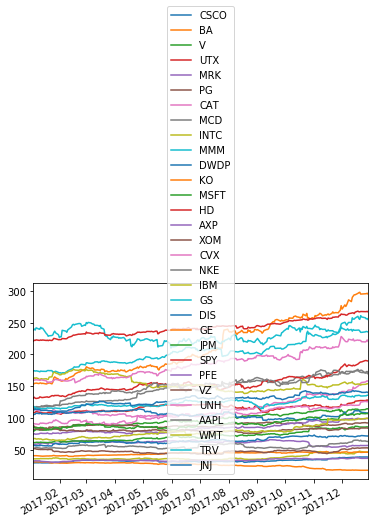

In [11]:
df_adj_close.plot()

In [12]:
# normalize price
def normalize_price(price):
    return price / price.iloc[0,:] 
df_normalized_adj_close = normalize_price(df_adj_close)

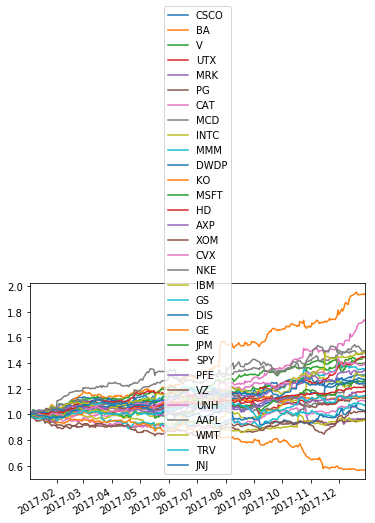

In [13]:
df_normalized_adj_close.plot()

In [14]:
# compute daily return
def compute_daily_return(price):
    return price.pct_change()
df_daily_return = compute_daily_return(df_adj_close)

In [15]:
df_daily_return.head()

,CSCO,BA,V,UTX,MRK,PG,CAT,MCD,INTC,MMM,...,GE,JPM,SPY,PFE,VZ,UNH,AAPL,WMT,TRV,JNJ
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.005945,0.010512,0.008176,0.000632,-0.000332,0.003563,-0.004469,-0.001170,-0.005191,0.001516,...,0.000316,0.001844,0.005949,0.008788,-0.001099,0.002849,-0.001119,0.005826,-0.005376,-0.001640
2017-01-05,0.002326,0.000567,0.011728,0.004058,-0.000333,0.006627,-0.006092,0.001841,-0.001648,-0.003421,...,-0.005678,-0.009205,-0.000794,0.009613,0.002201,0.001667,0.005085,0.002172,-0.015967,0.010463
2017-01-06,0.001989,0.002457,0.013812,0.010777,0.002662,-0.000353,0.000430,0.008856,0.003576,0.002926,...,0.002855,0.000116,0.003578,-0.003868,-0.014835,0.001418,0.011148,-0.013726,-0.000507,-0.004792
2017-01-09,-0.001654,-0.004903,-0.005595,-0.009329,0.013771,-0.007409,-0.007201,-0.002733,0.003564,-0.005386,...,-0.004745,0.000697,-0.003301,-0.000299,-0.010890,-0.002832,0.009159,0.006592,-0.008032,-0.000172


In [16]:
df_daily_return.describe()

,CSCO,BA,V,UTX,MRK,PG,CAT,MCD,INTC,MMM,...,GE,JPM,SPY,PFE,VZ,UNH,AAPL,WMT,TRV,JNJ
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.001096,0.002696,0.001505,0.000690,-0.000097,0.000496,0.002269,0.001592,0.001098,0.001242,...,-0.002172,0.000958,0.000764,0.000551,0.000124,0.001347,0.001632,0.001621,0.000584,0.000879
std,0.009889,0.011076,0.008131,0.008233,0.009827,0.006803,0.012840,0.008183,0.010816,0.007984,...,0.012504,0.010231,0.004234,0.007018,0.010694,0.008999,0.011113,0.011484,0.008120,0.007217
min,-0.072147,-0.028496,-0.030875,-0.056903,-0.060611,-0.036467,-0.042808,-0.032192,-0.034197,-0.050524,...,-0.071742,-0.038124,-0.017744,-0.018241,-0.043694,-0.036847,-0.038777,-0.046509,-0.037281,-0.031021
25%,-0.003234,-0.003763,-0.002613,-0.003257,-0.004356,-0.002929,-0.004368,-0.002199,-0.004874,-0.002283,...,-0.006727,-0.004184,-0.001206,-0.003645,-0.005881,-0.003407,-0.003724,-0.003651,-0.003670,-0.002780
50%,0.001225,0.002045,0.001706,0.001356,-0.000076,0.000232,0.001247,0.001098,0.000983,0.000561,...,-0.001619,0.000117,0.000517,0.000000,-0.000543,0.001384,0.000580,0.001470,0.000952,0.000073
75%,0.005860,0.008474,0.006030,0.004118,0.004575,0.003861,0.007395,0.005224,0.005956,0.004976,...,0.004387,0.006687,0.002498,0.004075,0.005212,0.006514,0.006940,0.006166,0.004749,0.004957
max,0.051891,0.098795,0.045929,0.029220,0.036466,0.037105,0.078608,0.055651,0.073761,0.059129,...,0.035791,0.035258,0.013997,0.032126,0.076802,0.055331,0.060981,0.108984,0.039764,0.034308


In [17]:
# compute expected return
def compute_expected_return(df_daily_return):
    return 252 * df_daily_return.mean() 
df_mu = compute_expected_return(df_daily_return)

In [18]:
df_mu

CSCO    0.276143
BA      0.679319
V       0.379170
UTX     0.174000
MRK    -0.024541
PG      0.124868
CAT     0.571867
MCD     0.401063
INTC    0.276742
MMM     0.312888
DWDP    0.255614
KO      0.131320
MSFT    0.348395
HD      0.378995
AXP     0.303066
XOM    -0.039904
CVX     0.110124
NKE     0.223443
IBM    -0.036145
GS      0.085639
DIS     0.040388
GE     -0.547421
JPM     0.241311
SPY     0.192646
PFE     0.138935
VZ      0.031130
UNH     0.339457
AAPL    0.411191
WMT     0.408517
TRV     0.147287
JNJ     0.221399
dtype: float64

In [19]:
# compute volatility 
def compute_volatility(df_daily_return):
    return np.sqrt(252) * df_daily_return.std()
df_vol = compute_volatility(df_daily_return)

In [20]:
df_vol

CSCO    0.156982
BA      0.175823
V       0.129083
UTX     0.130701
MRK     0.156003
PG      0.107991
CAT     0.203835
MCD     0.129905
INTC    0.171706
MMM     0.126750
DWDP    0.171347
KO      0.090358
MSFT    0.148214
HD      0.131320
AXP     0.131050
XOM     0.111800
CVX     0.141045
NKE     0.218068
IBM     0.157063
GS      0.197145
DIS     0.150830
GE      0.198499
JPM     0.162411
SPY     0.067219
PFE     0.111414
VZ      0.169759
UNH     0.142857
AAPL    0.176406
WMT     0.182298
TRV     0.128896
JNJ     0.114559
dtype: float64

In [21]:
# compute sharpe ratio
def compute_sharpe_ratio(mu, vol):
    return mu / vol
df_sharpe = compute_sharpe_ratio(df_mu, df_vol)

In [22]:
df_sharpe

CSCO    1.759075
BA      3.863661
V       2.937407
UTX     1.331284
MRK    -0.157312
PG      1.156281
CAT     2.805534
MCD     3.087356
INTC    1.611721
MMM     2.468550
DWDP    1.491795
KO      1.453333
MSFT    2.350626
HD      2.886049
AXP     2.312599
XOM    -0.356921
CVX     0.780772
NKE     1.024651
IBM    -0.230130
GS      0.434398
DIS     0.267773
GE     -2.757800
JPM     1.485805
SPY     2.865943
PFE     1.247015
VZ      0.183376
UNH     2.376206
AAPL    2.330938
WMT     2.240937
TRV     1.142681
JNJ     1.932616
dtype: float64

In [23]:
# compute covariance matrix
def compute_covariance_matrix(df_daily_return):
    return 252 * df_daily_return.cov()
df_cov = compute_covariance_matrix(df_daily_return)

In [24]:
df_cov

,CSCO,BA,V,UTX,MRK,PG,CAT,MCD,INTC,MMM,...,GE,JPM,SPY,PFE,VZ,UNH,AAPL,WMT,TRV,JNJ
CSCO,0.024643,0.003966,0.005588,0.005082,0.003545,0.002690,0.008098,0.002292,0.007637,0.005074,...,0.004545,0.007516,0.005394,0.003826,0.003564,0.002391,0.005601,0.004660,0.002233,0.004195
BA,0.003966,0.030914,0.005426,0.006046,0.001077,0.000681,0.008629,0.001231,0.004181,0.004305,...,0.006604,0.006934,0.004396,0.001707,0.004391,0.003268,0.004457,-0.000406,0.001519,0.000395
V,0.005588,0.005426,0.016662,0.005502,-0.000359,0.000905,0.004905,0.004484,0.006007,0.004411,...,-0.000582,0.004382,0.004699,0.001437,-0.001730,0.003817,0.008412,0.001402,0.000266,0.002428
UTX,0.005082,0.006046,0.005502,0.017083,0.001709,-0.000175,0.005567,0.002331,0.004563,0.004884,...,0.002465,0.005127,0.003579,0.003754,0.001230,0.003496,0.003469,0.000732,0.003913,0.002205
MRK,0.003545,0.001077,-0.000359,0.001709,0.024337,0.003444,0.001256,0.000815,-0.001328,0.002582,...,0.006825,0.004077,0.002312,0.006066,0.008394,0.001463,-0.001919,0.003654,0.001900,0.004480
PG,0.002690,0.000681,0.000905,-0.000175,0.003444,0.011662,0.003542,0.002782,0.001684,0.000935,...,0.001240,-0.000112,0.001522,0.001606,0.003036,-0.000014,0.000764,0.002484,0.001555,0.001961
CAT,0.008098,0.008629,0.004905,0.005567,0.001256,0.003542,0.041549,0.009591,0.007082,0.005066,...,0.004167,0.012166,0.006650,0.001678,0.002789,0.003368,0.006184,0.001600,0.002869,-0.000169
MCD,0.002292,0.001231,0.004484,0.002331,0.000815,0.002782,0.009591,0.016875,0.003047,0.000378,...,-0.001771,0.002020,0.002498,0.000156,-0.000219,0.003149,0.004382,0.001782,0.001678,0.002133
INTC,0.007637,0.004181,0.006007,0.004563,-0.001328,0.001684,0.007082,0.003047,0.029483,0.004264,...,0.000144,0.005405,0.005221,-0.000031,0.001838,0.004242,0.010042,0.003041,0.002179,0.001416
MMM,0.005074,0.004305,0.004411,0.004884,0.002582,0.000935,0.005066,0.000378,0.004264,0.016066,...,0.001369,0.002945,0.003114,0.003277,0.003802,0.004112,0.003032,-0.000454,0.002550,0.004063


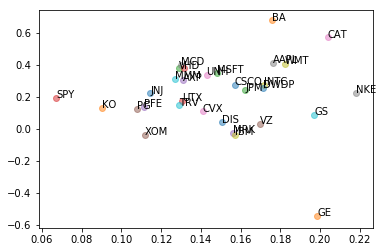

In [25]:
# plot risk-return plot
fig, ax = plt.subplots()     
for i, ticker in enumerate(ticker_list):
    ax.scatter(df_vol[i], df_mu[i], alpha=0.5)
    ax.annotate(ticker, (df_vol[i],df_mu[i]))
plt.savefig('img/many assets risk-return plot.png')

In [26]:
# construction of equal portfolio
n = len(ticker_list)
weights_equal = np.ones((n,)) / n
adj_close_equal = np.sum(weights_equal * df_normalized_adj_close, axis=1)
daily_return_equal = adj_close_equal.pct_change()
mu_equal = compute_expected_return(daily_return_equal)
vol_equal = compute_volatility(daily_return_equal)

In [27]:
adj_close_equal

2017-01-03    1.000000
2017-01-04    1.002909
2017-01-05    1.001562
2017-01-06    1.004037
2017-01-09    1.000907
2017-01-10    0.999219
2017-01-11    1.003142
2017-01-12    0.999971
2017-01-13    0.999720
2017-01-17    0.998321
2017-01-18    0.998101
2017-01-19    0.993913
2017-01-20    0.998766
2017-01-23    0.996226
2017-01-24    1.002055
2017-01-25    1.008260
2017-01-26    1.008617
2017-01-27    1.009468
2017-01-30    1.004114
2017-01-31    0.999840
2017-02-01    0.999997
2017-02-02    1.001000
2017-02-03    1.008600
2017-02-06    1.007751
2017-02-07    1.008838
2017-02-08    1.009035
2017-02-09    1.014506
2017-02-10    1.018237
2017-02-13    1.024936
2017-02-14    1.029736
                ...   
2017-11-16    1.185541
2017-11-17    1.180511
2017-11-20    1.183287
2017-11-21    1.190506
2017-11-22    1.188314
2017-11-24    1.190171
2017-11-27    1.191504
2017-11-28    1.204260
2017-11-29    1.207757
2017-11-30    1.221866
2017-12-01    1.220389
2017-12-04    1.222248
2017-12-05 

In [28]:
daily_return_equal

2017-01-03         NaN
2017-01-04    0.002909
2017-01-05   -0.001343
2017-01-06    0.002471
2017-01-09   -0.003118
2017-01-10   -0.001686
2017-01-11    0.003927
2017-01-12   -0.003161
2017-01-13   -0.000251
2017-01-17   -0.001399
2017-01-18   -0.000221
2017-01-19   -0.004196
2017-01-20    0.004882
2017-01-23   -0.002543
2017-01-24    0.005851
2017-01-25    0.006192
2017-01-26    0.000354
2017-01-27    0.000844
2017-01-30   -0.005304
2017-01-31   -0.004256
2017-02-01    0.000157
2017-02-02    0.001003
2017-02-03    0.007592
2017-02-06   -0.000842
2017-02-07    0.001078
2017-02-08    0.000196
2017-02-09    0.005422
2017-02-10    0.003678
2017-02-13    0.006579
2017-02-14    0.004683
                ...   
2017-11-16    0.010837
2017-11-17   -0.004242
2017-11-20    0.002351
2017-11-21    0.006100
2017-11-22   -0.001841
2017-11-24    0.001563
2017-11-27    0.001120
2017-11-28    0.010706
2017-11-29    0.002903
2017-11-30    0.011682
2017-12-01   -0.001209
2017-12-04    0.001524
2017-12-05 

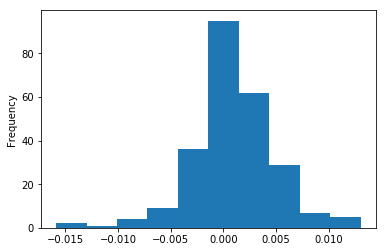

In [29]:
daily_return_equal.plot(kind='hist')

In [30]:
mu_equal

0.22371790658206372

In [31]:
vol_equal

0.062391423912549905

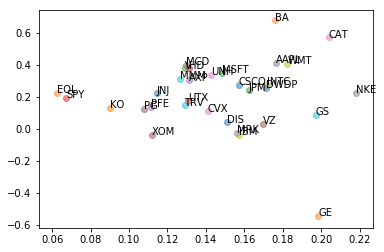

In [32]:
# plot risk-return plot
fig, ax = plt.subplots()     
for i, ticker in enumerate(ticker_list):
    ax.scatter(df_vol[i], df_mu[i], alpha=0.5)
    ax.annotate(ticker, (df_vol[i],df_mu[i]))   
ax.scatter(vol_equal, mu_equal, alpha=0.5)
ax.annotate('EQL', (vol_equal,mu_equal))
plt.savefig('img/many assets + EQL risk-return plot.png')

In [33]:
# construction of random portfolio with no short positions
n = len(ticker_list)
weights = np.random.uniform(0.,1.,(n,)) 
weights_random = weights / np.sum(weights)
adj_close_random = np.sum(weights_random * df_normalized_adj_close, axis=1)
daily_return_random = adj_close_random.pct_change()
mu_random = compute_expected_return(daily_return_random)
vol_random = compute_volatility(daily_return_random)

In [34]:
adj_close_random

2017-01-03    1.000000
2017-01-04    1.003992
2017-01-05    1.002812
2017-01-06    1.005081
2017-01-09    1.001869
2017-01-10    1.000136
2017-01-11    1.003160
2017-01-12    0.999345
2017-01-13    0.998657
2017-01-17    0.998808
2017-01-18    0.999210
2017-01-19    0.995452
2017-01-20    0.999805
2017-01-23    0.997672
2017-01-24    1.002892
2017-01-25    1.008790
2017-01-26    1.009303
2017-01-27    1.008676
2017-01-30    1.005104
2017-01-31    1.002394
2017-02-01    1.003995
2017-02-02    1.004460
2017-02-03    1.011665
2017-02-06    1.011335
2017-02-07    1.013513
2017-02-08    1.013867
2017-02-09    1.020049
2017-02-10    1.022957
2017-02-13    1.028911
2017-02-14    1.033801
                ...   
2017-11-16    1.205307
2017-11-17    1.199118
2017-11-20    1.202441
2017-11-21    1.210378
2017-11-22    1.207870
2017-11-24    1.209656
2017-11-27    1.211609
2017-11-28    1.223291
2017-11-29    1.228372
2017-11-30    1.242520
2017-12-01    1.240586
2017-12-04    1.244176
2017-12-05 

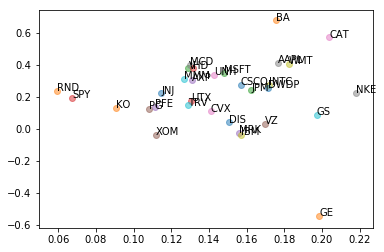

In [35]:
# plot risk-return plot
fig, ax = plt.subplots()
for i, ticker in enumerate(ticker_list):
    ax.scatter(df_vol[i], df_mu[i], alpha=0.5)
    ax.annotate(ticker, (df_vol[i],df_mu[i]))    
ax.scatter(vol_random, mu_random, alpha=0.5)
ax.annotate('RND', (vol_random,mu_random))
plt.savefig('img/many assets + RND_no_short risk-return plot.png')

In [36]:
# construction of random portfolio 
n = len(ticker_list)
weights = 1 + np.random.normal(0.,1.,(n,)) 
weights_random = weights / np.sum(weights)
adj_close_random = np.sum(weights_random * df_normalized_adj_close, axis=1)
daily_return_random = adj_close_random.pct_change()
mu_random = compute_expected_return(daily_return_random)
vol_random = compute_volatility(daily_return_random)

In [37]:
adj_close_random

2017-01-03    1.000000
2017-01-04    1.003487
2017-01-05    1.002409
2017-01-06    1.002353
2017-01-09    1.000791
2017-01-10    0.998671
2017-01-11    1.000890
2017-01-12    0.997644
2017-01-13    0.996982
2017-01-17    0.994697
2017-01-18    0.993130
2017-01-19    0.988021
2017-01-20    0.993731
2017-01-23    0.992076
2017-01-24    0.996945
2017-01-25    1.002127
2017-01-26    1.003251
2017-01-27    1.002831
2017-01-30    0.997527
2017-01-31    0.994068
2017-02-01    0.994883
2017-02-02    0.997290
2017-02-03    1.004928
2017-02-06    1.003517
2017-02-07    1.004381
2017-02-08    1.005524
2017-02-09    1.012352
2017-02-10    1.015120
2017-02-13    1.021137
2017-02-14    1.027360
                ...   
2017-11-16    1.188010
2017-11-17    1.182869
2017-11-20    1.186602
2017-11-21    1.192253
2017-11-22    1.188786
2017-11-24    1.191113
2017-11-27    1.192214
2017-11-28    1.206222
2017-11-29    1.214332
2017-11-30    1.225463
2017-12-01    1.225791
2017-12-04    1.229815
2017-12-05 

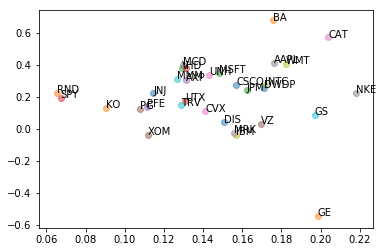

In [38]:
# plot risk-return plot
fig, ax = plt.subplots()
for i, ticker in enumerate(ticker_list):
    ax.scatter(df_vol[i], df_mu[i], alpha=0.5)
    ax.annotate(ticker, (df_vol[i],df_mu[i]))    
ax.scatter(vol_random, mu_random, alpha=0.5)
ax.annotate('RND', (vol_random,mu_random))
plt.savefig('img/many assets + RND risk-return plot.png')

In [39]:
# construction of many random portfolios 
n_portfolios = 10000

weights_list = []
mu_list = []
vol_list = []
sharpe_list = []
for _ in range(n_portfolios):
    n = len(ticker_list)
    weights = 1 + np.random.normal(0.,1.,(n,)) 
    weights = weights / np.sum(weights)
    adj_close = np.sum(weights * df_normalized_adj_close, axis=1)
    
    daily_return = adj_close.pct_change()
    mu = compute_expected_return(daily_return)
    vol = compute_volatility(daily_return)
    
    weights_list.append(weights)
    mu_list.append(mu)
    vol_list.append(vol)
    sharpe_list.append(mu/vol)
    
mu_list = pd.Series(mu_list)
vol_list = pd.Series(vol_list)
sharpe_list = pd.Series(sharpe_list)

In [40]:
# portfolio with highest sharpe ratio obtained using simulation
sharpe_idx = sharpe_list.idxmax()
sharpe_weights = weights_list[sharpe_idx]

In [41]:
sharpe_idx

5118

In [42]:
sharpe_weights

array([ 0.01951197,  0.12054879,  0.05927353, -0.04388407, -0.03032931,
        0.1551362 ,  0.05480864,  0.03973721,  0.00914419,  0.05779326,
       -0.02723129,  0.11591927, -0.01931823,  0.14450921,  0.00259489,
        0.0215947 ,  0.02073383,  0.01519439,  0.03012584, -0.09681634,
        0.05063121,  0.00127183,  0.05173928,  0.12067483,  0.0563874 ,
       -0.06869347,  0.05192198,  0.03764088,  0.03127991,  0.00558271,
        0.01251676])

In [43]:
# GMVP obtained using simulation
gmvp_idx = vol_list.idxmin()
gmvp_weights = weights_list[gmvp_idx]

In [44]:
gmvp_idx

8591

In [45]:
gmvp_weights

array([ 0.0089106 , -0.00080132,  0.02771714,  0.02770546,  0.0534761 ,
        0.06140479,  0.01330298,  0.03963444,  0.05427434,  0.04862688,
        0.01401116,  0.04025077,  0.0132299 ,  0.04651024,  0.08993004,
        0.03444472,  0.05115447,  0.01223928,  0.01087919, -0.0103193 ,
        0.03978441,  0.04691162, -0.04832123,  0.02359048,  0.04862551,
        0.02064919,  0.01378695,  0.04725726,  0.0255484 ,  0.05894185,
        0.08664369])

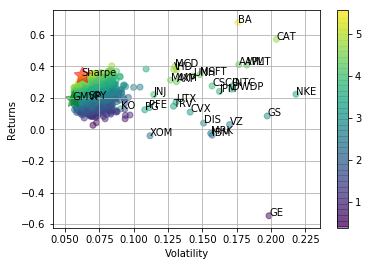

In [46]:
# plot risk-return plot with GMVP and portfolio with highest sharpe ratio 
fig = plt.figure()
ax = fig.gca()

plt.scatter(df_vol, df_mu, alpha=0.5, c=df_sharpe)
plt.scatter(vol_list, mu_list, alpha=0.5, c=sharpe_list) 
for i, ticker in enumerate(ticker_list):
    ax.annotate(ticker, (df_vol[i],df_mu[i]))
plt.colorbar()
    
ax.scatter(vol_list[sharpe_idx], mu_list[sharpe_idx], alpha=0.5,
          marker = (5,1,0), s = 300, c='r')
ax.scatter(vol_list[gmvp_idx], mu_list[gmvp_idx], alpha=0.5,
          marker = (5,1,0), s = 300, c='g')
ax.annotate('Sharpe', (vol_list[sharpe_idx], mu_list[sharpe_idx]))
ax.annotate('GMVP', (vol_list[gmvp_idx], mu_list[gmvp_idx]))

plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.grid()
    
plt.savefig('img/risk-return plot with GMVP and portfolio with highest sharpe ratio.png')

In [47]:
A = np.array(df_cov)
A

array([[ 2.46432950e-02,  3.96617453e-03,  5.58764276e-03,
         5.08199633e-03,  3.54462932e-03,  2.69032715e-03,
         8.09760971e-03,  2.29186887e-03,  7.63748081e-03,
         5.07367326e-03,  7.81316943e-03,  1.54606987e-03,
         7.32933470e-03,  5.65070598e-03,  6.09319130e-03,
         1.85950191e-03,  1.11937079e-03,  3.96791064e-03,
         3.88585314e-03,  7.51874590e-03,  2.83120243e-03,
         4.54472967e-03,  7.51585042e-03,  5.39434836e-03,
         3.82642542e-03,  3.56362509e-03,  2.39069888e-03,
         5.60132787e-03,  4.66038535e-03,  2.23344366e-03,
         4.19532655e-03],
       [ 3.96617453e-03,  3.09136324e-02,  5.42555503e-03,
         6.04637729e-03,  1.07744365e-03,  6.81074737e-04,
         8.62929136e-03,  1.23095092e-03,  4.18103156e-03,
         4.30524016e-03,  6.34421181e-03,  1.74329742e-03,
         3.54397043e-03,  1.60111894e-03,  3.69327554e-03,
         1.58784652e-03,  2.86766758e-03, -7.62485697e-04,
         3.45962072e-03,  1.05

In [48]:
la?

In [49]:
B = la.inv(A)
B

array([[ 6.23859127e+01,  2.76771584e+00, -2.16252308e+00,
        -4.17374710e+00, -2.10613354e+00, -1.04897724e+00,
        -1.80920152e+00,  4.87776583e+00, -3.24159944e+00,
        -3.41607470e+00, -2.68175940e+00, -5.18952279e+00,
        -1.69222041e+00, -1.07913533e+01,  2.18058083e+00,
         2.53880898e+00,  6.89066399e+00,  7.55447989e-01,
        -1.22830915e+00,  8.80554387e+00, -1.12015693e+00,
        -1.41181508e+00, -1.10447295e+01, -6.87545901e+01,
         8.55145268e-01,  1.88932462e+00,  1.03219967e+01,
         4.12327167e+00, -2.15607664e+00,  5.96524749e+00,
        -1.06287431e+01],
       [ 2.76771584e+00,  4.46692198e+01, -4.74390133e+00,
        -7.59803084e+00,  4.45919220e+00,  2.69964269e+00,
        -3.35188313e+00,  1.54047094e+00,  1.53663297e+00,
        -3.89441885e+00,  6.57780950e-01, -8.90223669e+00,
         9.12626015e+00,  3.07764951e+00,  8.23098953e+00,
         6.52612142e+00,  8.24587647e-01,  4.01055863e+00,
        -1.86363194e-01, -6.74

In [50]:
np.sum( np.abs( A@B - np.eye(31) ) )

1.4921410210009336e-13

In [51]:
np.sum( np.abs( B@A - np.eye(31) ) )

9.285276593548216e-14

In [52]:
C = B@np.ones((31,1))
C = C / np.sum(C)
C

array([[-0.04621258],
       [ 0.00646704],
       [ 0.01560848],
       [ 0.04589539],
       [ 0.00477591],
       [ 0.02334838],
       [-0.04557347],
       [ 0.08814167],
       [-0.01196621],
       [ 0.04716462],
       [-0.03292838],
       [ 0.18467554],
       [ 0.00670965],
       [ 0.05929223],
       [ 0.00677459],
       [ 0.0502129 ],
       [ 0.05529046],
       [ 0.01731373],
       [ 0.03246034],
       [-0.05392805],
       [ 0.07373182],
       [ 0.00333581],
       [ 0.00891697],
       [ 0.32899583],
       [ 0.0461125 ],
       [-0.00919873],
       [-0.00860293],
       [ 0.0093315 ],
       [ 0.02413617],
       [ 0.01824209],
       [ 0.05147672]])

In [53]:
np.sum( np.abs( gmvp_weights - C.reshape((-1,)) ) ) 

1.3486460717133077

# Global minimum variance portfolio

$$
w_{GMVP}
=
\frac{\Sigma^{-1}
\left[\begin{array}{l}
1\\
1\\
\vdots\\
1\\
1
\end{array}\right]}{\mbox{np.sum}\left(\Sigma^{-1}
\left[\begin{array}{l}
1\\
1\\
\vdots\\
1\\
1
\end{array}\right]\right)}
$$

### Quadratic program

$$\begin{array}{llll}
\mbox{argmin}_{\bf x}&&{\bf x}^T\Sigma{\bf x}\\
\\
\mbox{subject to}&&{\bf 1}^T{\bf x}=1\\
\end{array}$$

### Lagrangian

$$
{\cal L}({\bf x},\lambda)={\bf x}^T\Sigma{\bf x}-\lambda({\bf 1}^T{\bf x}-1)
$$

### Solution

$$\begin{array}{llllll}
\displaystyle \frac{\partial{\cal L}}{\partial{\bf x}}&=&2\Sigma{\bf x}-\lambda{\bf 1}={\bf 0}&\Rightarrow&{\bf x}\propto \Sigma^{-1}{\bf 1}
\ \ \Rightarrow\ \ \displaystyle
{\bf x}
=\frac{\Sigma^{-1}{\bf 1}}
{\sum_{i=1}^n\left(\Sigma^{-1}{\bf 1}\right)_i}\nonumber\\
\\
\displaystyle \frac{\partial{\cal L}}{\partial\lambda}&=&-({\bf 1}^T{\bf x}-1)=0\nonumber
\end{array}$$

In [54]:
# gmvp obtained using formular
A = df_cov
B = la.inv(np.array(A))
C = B@np.ones((31,1))
C = C / np.sum(C)
w_gmvp = C.reshape((-1,))
adj_close = np.sum(w_gmvp * df_normalized_adj_close, axis=1)
daily_return = adj_close.pct_change()
mu_gmvp = compute_expected_return(daily_return)
vol_gmvp = compute_volatility(daily_return)

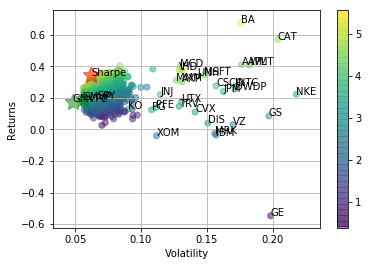

In [55]:
# plot risk-return plot with GMVP, GMVP2 and portfolio with highest sharpe ratio 
fig = plt.figure()
ax = fig.gca()

plt.scatter(df_vol, df_mu, alpha=0.5, c=df_sharpe)
plt.scatter(vol_list, mu_list, alpha=0.5, c=sharpe_list) 
for i, ticker in enumerate(ticker_list):
    ax.annotate(ticker, (df_vol[i],df_mu[i]))
plt.colorbar()
    
ax.scatter(vol_list[sharpe_idx], mu_list[sharpe_idx], alpha=0.5,
          marker = (5,1,0), s = 300, c='r')
ax.scatter(vol_list[gmvp_idx], mu_list[gmvp_idx], alpha=0.5,
          marker = (5,1,0), s = 300, c='g')
ax.scatter(vol_gmvp, mu_gmvp, alpha=0.5,
          marker = (5,1,0), s = 300, c='g')
ax.annotate('Sharpe', (vol_list[sharpe_idx], mu_list[sharpe_idx]))
ax.annotate('GMVP', (vol_list[gmvp_idx], mu_list[gmvp_idx]))
ax.annotate('GMVP2', (vol_gmvp, mu_gmvp))

plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.grid()
    
plt.savefig('img/risk-return plot with GMVP, GMVP2 and portfolio with highest sharpe ratio.png')

In [56]:
vol_list[gmvp_idx]

0.055573294397685914

In [57]:
vol_gmvp

0.048088950204556315

In [58]:
# formula wins over simulation
print("GMVP Vol obtained using simulation: {}".format(vol_list[gmvp_idx]))
print("GMVP Vol obtained using formula:    {}".format(vol_gmvp))

GMVP Vol obtained using simulation: 0.055573294397685914
GMVP Vol obtained using formula:    0.048088950204556315


# Sharpe portfolio ${\bf s}$ of risk-free interest rate $r$ (Merton 1973)

$$
w_{sharpe}(r)
=
\frac{\Sigma^{-1}
\left(\left[\begin{array}{c}
\mu[0]\\
\mu[1]\\
\vdots\\
\mu[n-2]\\
\mu[n-1]
\end{array}\right]-r\right)}{\mbox{np.sum}\left(\left[\begin{array}{c}
\mu[0]\\
\mu[1]\\
\vdots\\
\mu[n-2]\\
\mu[n-1]
\end{array}\right]-r\right)}
$$

### First try

$$
\begin{array}{llll}
\mbox{argmax}_{\bf x}\ \mbox{or}\ \mbox{argmin}_{\bf x}&&&\displaystyle\frac{\mu^T{\bf x}-r}{\sqrt{{\bf x}^T\Sigma{\bf x}}}
=\frac{(\mu-r)^T{\bf x}}{\sqrt{{\bf x}^T\Sigma{\bf x}}}:=\frac{\tilde{\mu}^T{\bf x}}{\sqrt{{\bf x}^T\Sigma{\bf x}}}\quad\leftarrow\mbox{Sharpe ratio}\\
\\
\mbox{subject to}&&&{\bf 1}^T{\bf x}=1\quad\leftarrow\mbox{Nasty non-convex constraint}\\
\end{array}
$$

### Second try

Since ${\bf x}$ and $2{\bf x}$ report same objective values,
$$
\mbox{argmax}_{\bf x}\ \mbox{or}\ \mbox{argmin}_{\bf x}\ \ \displaystyle\frac{\tilde{\mu}^T{\bf x}}{\sqrt{{\bf x}^T\Sigma{\bf x}}}
$$

### Third try

$$
\begin{array}{llll}
\mbox{argmax}_{\bf x}\ \mbox{or}\ \mbox{argmin}_{\bf x}&&&\tilde{\mu}^T{\bf x}\\
\\
\mbox{subject to}&&&{\bf x}^T\Sigma{\bf x}=1\\
\end{array}
$$

### Lagrangian

$$
{\cal L}({\bf x},\lambda)
=
\tilde{\mu}^T{\bf x}+\lambda\left({\bf x}^T\Sigma{\bf x}-1\right)
$$

### Solution

$$\begin{array}{llllll}
\displaystyle \frac{\partial{\cal L}}{\partial{\bf x}}&=&\tilde{\mu}+2\lambda\Sigma{\bf x}={\bf 0}&\Rightarrow&2\lambda\Sigma{\bf x}=-\tilde\mu\nonumber\\
\\
\displaystyle \frac{\partial{\cal L}}{\partial\lambda}&=&{\bf x}^T\Sigma{\bf x}-1=0&\Rightarrow&{\bf x}^T\Sigma{\bf x}=1\nonumber
\end{array}$$
$$
{\bf x}\propto \Sigma^{-1}\tilde{\mu}=\Sigma^{-1}({\mu}-r)
\ \ \Rightarrow\ \ 
{\bf x}
=\frac{\Sigma^{-1}({\mu}-r)}
{\sum_{i=1}^n\left(\Sigma^{-1}({\mu}-r)\right)_i}
$$


<div align="center"><img src="img/degjhjhkhkjtj4ij.png" width="50%"></div>

In [59]:
# sharpe portfolio obtained using formular
def sharpe(r):
    A = df_cov
    B = la.inv(np.array(A))
    C = B@( np.array(df_mu).reshape((-1,1)) - r)
    C = C / np.sum(C)
    w_sharpe = C.reshape((-1,))
    adj_close = np.sum(w_sharpe * df_normalized_adj_close, axis=1)
    daily_return = adj_close.pct_change()
    mu_sharpe = compute_expected_return(daily_return)
    vol_sharpe = compute_volatility(daily_return)
    return w_sharpe, mu_sharpe, vol_sharpe 
w_sharpe, mu_sharpe, vol_sharpe = sharpe(0) 

In [60]:
mu_sharpe/vol_sharpe

7.8268793423749745

In [61]:
mu_list[sharpe_idx]/vol_list[sharpe_idx]

5.550760271350483

In [62]:
# formula wins over simulation
print("Sharpe Ratio obatined using simulation: {}".format(mu_list[sharpe_idx]/vol_list[sharpe_idx]))
print("Sharpe Ratio obatined using formula:    {}".format(mu_sharpe/vol_sharpe))

Sharpe Ratio obatined using simulation: 5.550760271350483
Sharpe Ratio obatined using formula:    7.8268793423749745


# Envelope portfolio ${\bf e}_r$ identified by $y=r$

### Quadratic program

$$\begin{array}{lllll}
\mbox{argmin}_{\bf x}&&{\bf x}^T\Sigma{\bf x}\\
\\
\mbox{subject to}&&\mu^T{\bf x}=r,\ {\bf 1}^T{\bf x}=1\\
\end{array}$$

### Lagrangian

$$
{\cal L}({\bf x},\lambda_1,\lambda_2)={\bf x}^T\Sigma{\bf x}-\lambda_1(\mu^T{\bf x}-r)-\lambda_2({\bf 1}^T{\bf x}-1)
$$

### Solution

$$\begin{array}{llllll}
\displaystyle \frac{\partial{\cal L}}{\partial{\bf x}}&=&2\Sigma{\bf x}-\lambda_1\mu-\lambda_2{\bf 1}={\bf 0}&\Rightarrow&2\Sigma{\bf x}-\lambda_1\mu-\lambda_2{\bf 1}={\bf 0}\nonumber\\
\\
\displaystyle \frac{\partial{\cal L}}{\partial\lambda_1}&=&-(\mu^T{\bf x}-r)=0&\Rightarrow&\mu^T{\bf x}=r\nonumber\\
\\
\displaystyle \frac{\partial{\cal L}}{\partial\lambda_2}&=&-({\bf 1}^T{\bf x}-1)=0&\Rightarrow&{\bf 1}^T{\bf x}=1\nonumber
\end{array}$$
$$
\left[\begin{array}{cccccc}
2\sigma_1^2&2\sigma_{12}&\cdots&2\sigma_{1n}&-\mu_1&-1\\
2\sigma_{21}&2\sigma_{2}^2&\cdots&2\sigma_{2n}&-\mu_2&-1\\
\vdots&\vdots&\ddots&\vdots&\vdots&\vdots\\
2\sigma_{n1}&2\sigma_{22}&\cdots&2\sigma_{n}^2&-\mu_n&-1\\
\mu_1&\mu_2&\cdots&\mu_n&0&0\\
1&1&\cdots&1&0&0\\
\end{array}\right]
\left[\begin{array}{cccccc}x_1\\x_2\\\vdots\\x_n\\\lambda_1\\\lambda_2\\\end{array}\right]
=
\left[\begin{array}{cccccc}0\\0\\\vdots\\0\\r\\1\\\end{array}\right]
$$

<div align="center"><img src="img/degjhs4gsdjhkhkjtj4ij.png" width="50%"></div>

# Two funds theorem  (Merton)

$$
w_{frontier} = t*w_{e1} + (1-t)*w_{e2}(r)
$$
where $w_{e1}$ and $w_{e2}$ are two funds on envelope. 

In [63]:
w_gmvp

array([-0.04621258,  0.00646704,  0.01560848,  0.04589539,  0.00477591,
        0.02334838, -0.04557347,  0.08814167, -0.01196621,  0.04716462,
       -0.03292838,  0.18467554,  0.00670965,  0.05929223,  0.00677459,
        0.0502129 ,  0.05529046,  0.01731373,  0.03246034, -0.05392805,
        0.07373182,  0.00333581,  0.00891697,  0.32899583,  0.0461125 ,
       -0.00919873, -0.00860293,  0.0093315 ,  0.02413617,  0.01824209,
        0.05147672])

In [64]:
w_sharpe

array([ 6.84242215e-03,  3.43940243e-01,  1.72907143e-01, -9.81985889e-02,
        7.35399007e-03,  4.37346072e-04,  1.06959122e-01,  1.47921428e-01,
        1.58233004e-02,  1.32000088e-01,  1.64264731e-02,  4.46292531e-02,
        1.77827934e-01,  2.27259804e-01,  1.06357183e-01, -2.76315428e-01,
        2.79873625e-01,  5.06121494e-02, -8.52044539e-03, -2.15410517e-01,
        8.74489753e-02, -2.03635698e-01,  2.09622657e-01, -1.19138134e+00,
        1.15069366e-01, -3.52828168e-02,  1.03827119e-01,  1.65549216e-01,
        1.60846544e-01,  1.60758261e-01,  1.88451187e-01])

In [65]:
# construction of efficient frontier
n_portfolio = 1000

t = np.linspace(-2,2,n_portfolio)
frontier_weights_list = []
frontier_mu_list = []
frontier_vol_list = []
for i in range(n_portfolio):
    n = len(ticker_list)
    frontier_weights = t[i] * w_gmvp + (1-t[i]) * w_sharpe
    adj_close = np.sum(frontier_weights * df_normalized_adj_close, axis=1)
    
    daily_return = adj_close.pct_change()
    frontier_mu = compute_expected_return(daily_return)
    frontier_vol = compute_volatility(daily_return)
    
    frontier_weights_list.append(frontier_weights)
    frontier_mu_list.append(frontier_mu)
    frontier_vol_list.append(frontier_vol)
    
frontier_mu_list = pd.Series(frontier_mu_list)
frontier_vol_list = pd.Series(frontier_vol_list)

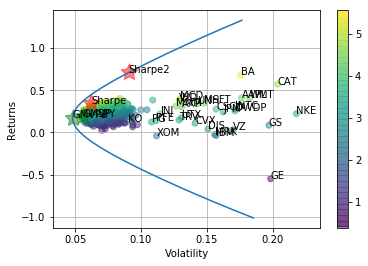

In [66]:
# plot of efficient frontier 
fig = plt.figure()
ax = fig.gca()

plt.scatter(df_vol, df_mu, alpha=0.5, c=df_sharpe)
plt.scatter(vol_list, mu_list, alpha=0.5, c=sharpe_list) 
for i, ticker in enumerate(ticker_list):
    ax.annotate(ticker, (df_vol[i],df_mu[i]))
plt.colorbar()
    
ax.scatter(vol_list[sharpe_idx], mu_list[sharpe_idx], alpha=0.5,
          marker = (5,1,0), s = 300, c='r')
ax.scatter(vol_list[gmvp_idx], mu_list[gmvp_idx], alpha=0.5,
          marker = (5,1,0), s = 300, c='g')
ax.scatter(vol_sharpe, mu_sharpe, alpha=0.5,
          marker = (5,1,0), s = 300, c='r')
ax.scatter(vol_gmvp, mu_gmvp, alpha=0.5,
          marker = (5,1,0), s = 300, c='g')
ax.annotate('Sharpe', (vol_list[sharpe_idx], mu_list[sharpe_idx]))
ax.annotate('GMVP', (vol_list[gmvp_idx], mu_list[gmvp_idx]))
ax.annotate('Sharpe2', (vol_sharpe, mu_sharpe))
ax.annotate('GMVP2', (vol_gmvp, mu_gmvp))

ax.plot(frontier_vol_list, frontier_mu_list)

plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.grid()
    
plt.savefig('img/efficient frontier.png')

# One fund theorem

### Capital market line or capital allocation line

<div align="center"><img src="img/dertj4ij.png" width="50%"></div>

If there is a risk free interest rate $r_f$ and the Sharpe portfolio ${\bf x}$ characterized by $r_f$, any efficient portfolio is a convex combination of the risk-free investment and the Sharpe portfolio. So, there is no other fund to look at.

Proposition 3 (Black, 1972): If c is an sharpe portfolio characteried by c,
$$
E(r_p) = c +\beta_p(E(r_c)-c)
$$
where
$$
\beta_p=\frac{Cov(r_p,r_c)}{\sigma_c^2}
$$
High beta means high expected return.

In [67]:
# construction of covariance matrix and expected returns
n_assets = 10
A = 1 + np.random.uniform(0.,1.,(n_assets,n_assets))
S = A@(A.T)
mu = 1 + np.random.uniform(0.,1.,(n_assets,1)) 
print(S.shape)
print(mu.shape)

(10, 10)
(10, 1)


In [68]:
# sharpe portfolio
w_sharpe = la.inv(S) @ mu 
w_sharpe = w_sharpe / np.sum(w_sharpe)
r_sharpe = np.sum( mu*w_sharpe )
vol_sharpe = np.sqrt( np.sum( w_sharpe*(S@w_sharpe) ) )
print(w_sharpe.shape)

(10, 1)


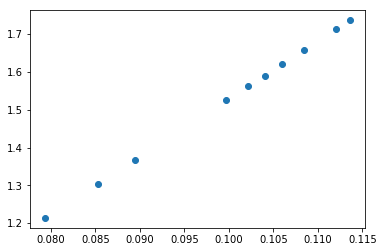

In [69]:
# linear regression of expected returns on betas using sharpe portfolio 
betas = []
expected_returns = []
vols = []
for i in range(n_assets):
    w = np.zeros((n_assets,1)) 
    w[i,0] = 1.
    
    r = np.sum( mu*w )
    expected_returns.append(r)
    
    beta = np.sum( w*(S@w_sharpe) ) / np.sum( w_gmvp*(S@w_sharpe) ) 
    betas.append(beta)
    
    vol = np.sqrt( np.sum( w*(S@w) ) ) 
    vols.append(vol)
    
plt.plot(betas,expected_returns,'o')